In [13]:
import netCDF4 as nc
import rasterio
import xarray as xr


In [14]:
nc = 'data/model_output_soil_moisture.nc'
nc_file = xr.open_dataset(nc)


In [15]:
print(nc_file.variables.keys())

KeysView(Frozen({'time': <xarray.IndexVariable 'time' (time: 8766)> Size: 70kB
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', ..., '2023-12-29T00:00:00.000000000',
       '2023-12-30T00:00:00.000000000', '2023-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]'), 'lat': <xarray.IndexVariable 'lat' (lat: 22)> Size: 176B
array([55.25, 54.75, 54.25, 53.75, 53.25, 52.75, 52.25, 51.75, 51.25, 50.75,
       50.25, 49.75, 49.25, 48.75, 48.25, 47.75, 47.25, 46.75, 46.25, 45.75,
       45.25, 44.75]), 'lon': <xarray.IndexVariable 'lon' (lon: 22)> Size: 176B
array([ 4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,  8.75,  9.25,
        9.75, 10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25,
       14.75, 15.25]), 'soil_moisture': <xarray.Variable (time: 8766, lat: 22, lon: 22)> Size: 34MB
[4242744 values with dtype=float64]}))


In [22]:
# Filter the dataset for years from 2018 onwards
ds_filtered = nc_file.sel(time=nc_file['time'].dt.year >= 2018)

# Calculate the minimum and maximum soil moisture for each grid cell for the filtered years
min_soil_moisture_filtered = ds_filtered['soil_moisture'].min(dim='time')
max_soil_moisture_filtered = ds_filtered['soil_moisture'].max(dim='time')

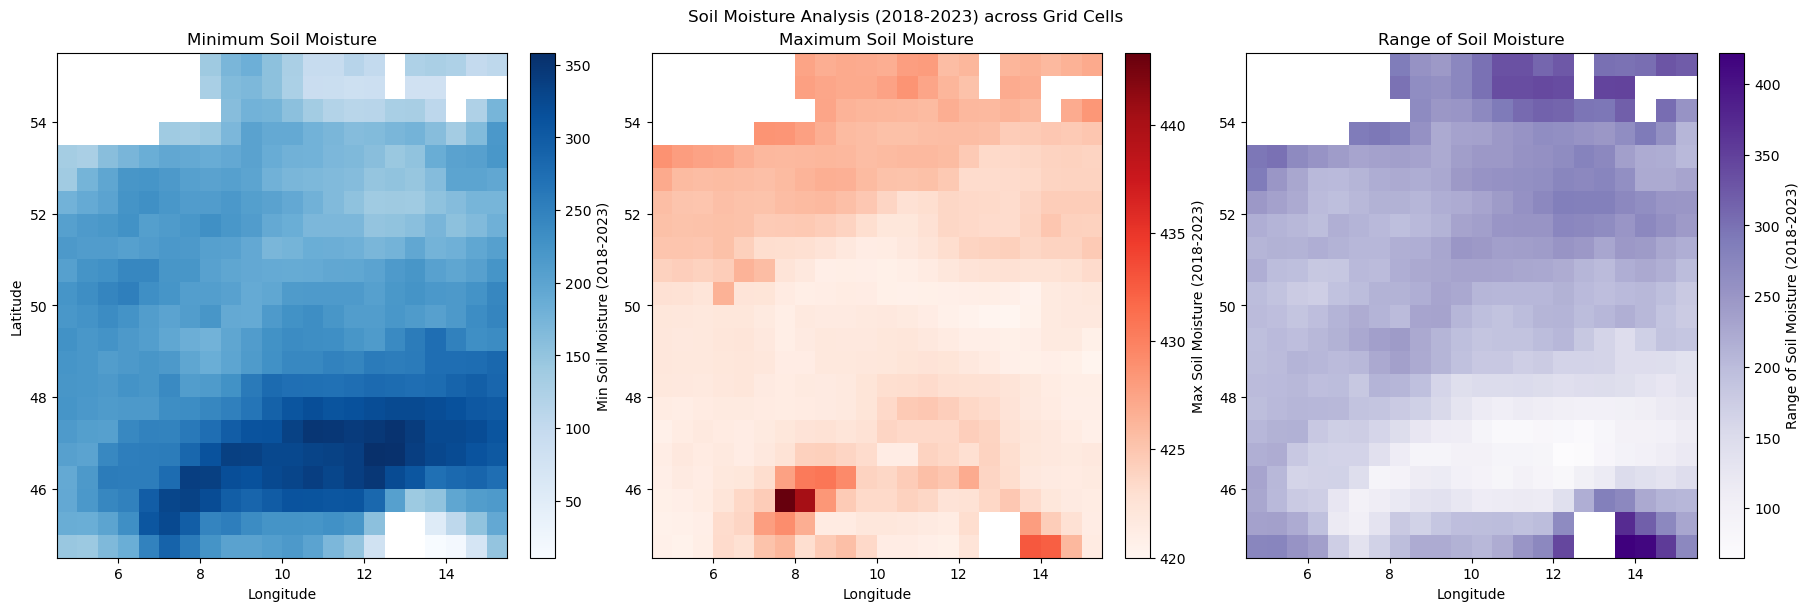

In [23]:
# Calculate the range between minimum and maximum soil moisture for each grid cell
range_soil_moisture_filtered = max_soil_moisture_filtered - min_soil_moisture_filtered

# Set up the figure and axes for three plots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), constrained_layout=True)
fig.suptitle('Soil Moisture Analysis (2018-2023) across Grid Cells')

# Plot minimum soil moisture
pcm = axs[0].pcolormesh(min_soil_moisture_filtered['lon'], min_soil_moisture_filtered['lat'], min_soil_moisture_filtered,
                        shading='auto', cmap='Blues')
fig.colorbar(pcm, ax=axs[0], label='Min Soil Moisture (2018-2023)')
axs[0].set_title('Minimum Soil Moisture')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Plot maximum soil moisture
pcm = axs[1].pcolormesh(max_soil_moisture_filtered['lon'], max_soil_moisture_filtered['lat'], max_soil_moisture_filtered,
                        shading='auto', cmap='Reds')
fig.colorbar(pcm, ax=axs[1], label='Max Soil Moisture (2018-2023)')
axs[1].set_title('Maximum Soil Moisture')
axs[1].set_xlabel('Longitude')

# Plot the range of soil moisture
pcm = axs[2].pcolormesh(range_soil_moisture_filtered['lon'], range_soil_moisture_filtered['lat'], range_soil_moisture_filtered,
                        shading='auto', cmap='Purples')
fig.colorbar(pcm, ax=axs[2], label='Range of Soil Moisture (2018-2023)')
axs[2].set_title('Range of Soil Moisture')
axs[2].set_xlabel('Longitude')

# Show the plot
plt.show()


In [25]:
# Save the minimum soil moisture data to a NetCDF file
min_soil_moisture_filtered.to_netcdf('data/aggregated_over_years_model_input/sm_min.nc')

# Save the maximum soil moisture data to a NetCDF file
max_soil_moisture_filtered.to_netcdf('data/aggregated_over_years_model_input/sm_max.nc')

# Save the range of soil moisture data to a NetCDF file
range_soil_moisture_filtered.to_netcdf('data/aggregated_over_years_model_input/sm_range.nc')
